In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tiktoken --quite

In [117]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken
import spacy

In [ ]:
# plot functions

def show_questions(title: str, questions: list, n: int = 6) -> None:
    """
    Display the first n questions from the given list with a title.

    Parameters:
    - title: A string to display as the category title.
    - questions: A list of questions.
    - n: The maximum number of questions to display (default is 6).
    """
    print(title)
    print("-" * len(title))
    for idx, question in enumerate(questions[:n], start=1):
        print(f"{idx}. {question}")
    print()



nlp = spacy.load("en_core_web_sm")

encoding = tiktoken.encoding_for_model("gpt-4")

def gpt4_tokenizer(text: str):
    """
    Tokenizes the text using the GPT-4 tokenizer from tiktoken.
    Returns a list of token strings.
    """
    token_ids = encoding.encode(text)
    tokens = [encoding.decode([tid]) for tid in token_ids]
    return tokens

def plot_character_distribution(df):
    """
    Plots a histogram (with KDE) of the character lengths in the 'question' column.
    Displays vertical lines for the median and mean character counts.
    """
    char_lengths = df["question"].map(len)
    sns.histplot(char_lengths, kde=True)
    plt.title("Amount of characters in questions")
    plt.xlabel("Amount of characters")
    plt.ylabel("Number of questions")

    median_char_len = char_lengths.median()
    mean_char_len = char_lengths.mean()
    plt.axvline(median_char_len, color='r', linestyle='--', label=f"Median: {median_char_len:.2f}")
    plt.axvline(mean_char_len, color='g', linestyle='--', label=f"Mean: {mean_char_len:.2f}")
    plt.legend()
    plt.show()

def plot_word_distribution(df):
    """
    Plots a histogram (with KDE) of the word counts in the 'question' column.
    Displays vertical lines for the median and mean word counts.
    """
    word_counts = df["question"].map(lambda x: len(x.split()))
    sns.histplot(word_counts, kde=True)
    plt.title("Amount of words in questions")
    plt.xlabel("Amount of words")
    plt.ylabel("Number of questions")

    median_word_count = word_counts.median()
    mean_word_count = word_counts.mean()
    plt.axvline(median_word_count, color='r', linestyle='--', label=f"Median: {median_word_count:.2f}")
    plt.axvline(mean_word_count, color='g', linestyle='--', label=f"Mean: {mean_word_count:.2f}")
    plt.legend()
    plt.show()

def plot_gpt4_token_distribution(df):
    """
    Uses the GPT-4 tokenizer to tokenize the 'question' column,
    filters out non-alphabetic tokens, counts the top 20 most common tokens,
    and displays a horizontal barplot.
    """
    questions = df['question'].tolist()

    all_tokens = [token for question in questions for token in gpt4_tokenizer(question)]

    alpha_tokens = [token.strip().lower() for token in all_tokens if token.strip().isalpha()]

    alpha_token_counts = Counter(alpha_tokens)
    top_tokens = alpha_token_counts.most_common(20)

    if top_tokens:
        tokens, counts = zip(*top_tokens)
        sns.barplot(x=list(counts), y=list(tokens))
        plt.title("Most common alphabetic tokens")
        plt.xlabel("Count")
        plt.ylabel("Token")
        plt.show()
    else:
        print("No tokens found after filtering.")

def plot_non_stopword_token_distribution(df):
    """
    Uses the GPT-4 tokenizer to tokenize the 'question' column,
    filters out non-alphabetic tokens and then filters out stopwords using spaCy.
    It then counts the top 20 most common non-stopword tokens and displays a horizontal barplot.
    """
    questions = df['question'].tolist()

    all_tokens = [token for question in questions for token in gpt4_tokenizer(question)]
    alpha_tokens = [token.strip().lower() for token in all_tokens if token.strip().isalpha()]
    non_stop_tokens = [token for token in alpha_tokens if not nlp.vocab[token].is_stop]
    non_stop_token_counts = Counter(non_stop_tokens)
    top_tokens = non_stop_token_counts.most_common(20)

    if top_tokens:
        tokens, counts = zip(*top_tokens)
        sns.barplot(x=list(counts), y=list(tokens))
        plt.title("Most common non-stopword tokens")
        plt.xlabel("Count")
        plt.ylabel("Token")
        plt.show()
    else:
        print("No non-stop tokens found after filtering.")




In [ ]:
# function to extract text

In [ ]:
# azocleantech_patents_qa_df['relevant_text'] = azocleantech_patents_qa_df['relevant_text'].apply(lambda x :  next((d['text'] for d in ast.literal_eval(x) if isinstance(d, dict) and 'text' in d), None))
# azocleantech_patents_qa_df['title'] = azocleantech_patents_qa_df['title'].apply(lambda x :  next((d['text'] for d in ast.literal_eval(x) if isinstance(d, dict) and 'text' in d), None))


In [ ]:
articles_df = pd.read_csv('/content/drive/MyDrive/SwissText SharedTask/cleantech_media_dataset.csv')

In [ ]:
articles_df.head()

In [ ]:
# azocleantech + solarindustrymag
azocleantech_df = articles_df[articles_df['domain']=='azocleantech']

In [ ]:
solarindustrymag_df = articles_df[articles_df['domain']=='solarindustrymag']

In [ ]:
# 7 paragraphs of azocleantech_df
selected_indices = [17690, 17915, 18349, 17715, 19247, 15788, 2195]
paragraphs_azocleantech_df = azocleantech_df.loc[selected_indices]

In [ ]:
paragraphs_azocleantech_df.to_csv("paragraphs_azocleantech_df.csv")

In [ ]:
# 8 paragraphs of solarindustrymag_df

selected_indices = [14,4307,1513,2216,13545,13382,2344,1578]
paragraphs_solarindustrymag_df = solarindustrymag_df.loc[selected_indices]

In [ ]:
paragraphs_solarindustrymag_df.to_csv("paragraphs_solarindustrymag_df.csv")

In [ ]:
import textwrap

def printwrap(text, wrap_lenght = 80):
  wrapped_text = textwrap.fill(text,wrap_lenght)
  return wrapped_text

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)


def generate_qa_pairs(df, target_qa_pairs=43):
    qa_pairs = []
    for _ in range(target_qa_pairs):
      for _, row in df.iterrows():
          paragraph = row['content']
          prompt = f"Based on the following reference text, generate a relevant question and its corresponding answer:\n\n{paragraph}"

          completion = client.chat.completions.create(
              extra_body={},
              model="meta-llama/llama-3.2-3b-instruct",
              messages=[
                  {
                      "role": "user",
                      "content": prompt
                  }
              ]
          )


        # if completion.choices:
          qa_text = completion.choices[0].message.content.split("**")
          question = qa_text[2]
          answer = qa_text[-1]
          qa_pairs.append({
              "question": question,
              "relevant_text": paragraph,
              "answer": answer,
              "article_url": row['url']
          })

      # if len(qa_pairs) >= target_qa_pairs:
      #     break

    return pd.DataFrame(qa_pairs)

paragraphs_solarindustrymag_df = pd.read_csv('paragraphs_solarindustrymag_df.csv')
paragraphs_azocleantech_df = pd.read_csv('paragraphs_azocleantech_df.csv')

solarindustrymag_qa_df = generate_qa_pairs(paragraphs_solarindustrymag_df, target_qa_pairs=300)
azocleantech_qa_df = generate_qa_pairs(paragraphs_azocleantech_df, target_qa_pairs=300)

solarindustrymag_qa_df.to_csv('solarindustrymag_qa_pairs.csv', index=False)
azocleantech_qa_df.to_csv('azocleantech_qa_pairs.csv', index=False)

### Generate the QA pairs for the patent dataset

In [ ]:
# topics -> azocleantech  + solarindustrymag


In [ ]:
azocleantech_words = ['cleantech', 'clean energy', 'renewable', 'sustainable','technology', 'innovation', 'startup', 'investment','energy', 'power', 'grid', 'storage', 'battery']
solarindustrymag_words = ['solar', 'photovoltaic', 'PV', 'panel', 'module', 'installation', 'inverter', 'system', 'cells']

In [ ]:
# patent_df = pd.read_csv("/content/drive/MyDrive/SwissText SharedTask/google_patents.csv")

In [ ]:
patent_df = pd.read_csv("/content/drive/MyDrive/SwissText SharedTask/dfs_google_patent.csv")

In [ ]:
patent_df = patent_df[patent_df['country_code']=="US"]

In [ ]:
patent_df

In [ ]:
mask_azocleantech = patent_df['abstract'].apply(
    lambda text: any(keyword in text.lower() for keyword in azocleantech_words)
)
mask_solarindustrymag = patent_df['abstract'].apply(
    lambda text: any(keyword in text.lower() for keyword in solarindustrymag_words)
)


df_azocleantech = patent_df[mask_azocleantech]
df_solarindustrymag = patent_df[mask_solarindustrymag]

In [ ]:
df_azocleantech

In [ ]:
# azocleantech : 8569 	19340, 170 	361 , 10213 	23026, 952 	2044, 7021 	15812, 8000 	18020 , 1163 	2610
azocleantech_indexes = [8569,170,10213,952,7021,8000,1163]

In [ ]:
azocleantech_df_selected_abstracts = df_azocleantech.loc[azocleantech_indexes]


In [ ]:
azocleantech_df_selected_abstracts

,Unnamed: 0,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc,tokens_title,tokens_abstract
8569,19340,US-2022036484-A1,US-202016942045-A,US,[{'text': 'Methods of allocating energy genera...,[{'text': 'Implementations of the disclosed su...,20220203,"['THEISS, KATHERINE', 'MADDOX, LINDSEY', 'YESB...","[{'code': 'Y04S50/14', 'inventive': False, 'fi...","['method', 'allocating', 'energy', 'generated'...","['implementation', 'disclosed', 'subject', 'ma..."
170,361,US-2022228555-A1,US-202217588796-A,US,"[{'text': 'Vertical axis wind turbine', 'langu...",[{'text': 'A vertical axis wind turbine (VAWT)...,20220721,"['REYNA, SID J.', 'CONARRO, PATRICK R.', 'Bach...","[{'code': 'F03D3/005', 'inventive': True, 'fir...","['vertical', 'axis', 'wind', 'turbine']","['vertical', 'axis', 'wind', 'turbine', 'vawt'..."
10213,23026,US-2022003206-A1,US-202117366696-A,US,[{'text': 'Wind energy installation and a meth...,[{'text': 'A wind energy installation includes...,20220106,"['HÖR, OLIVER', 'BEHL, STEFAN', 'WARFEN, KARST...","[{'code': 'Y02E10/72', 'inventive': False, 'fi...","['wind', 'energy', 'installation', 'method', '...","['wind', 'energy', 'installation', 'includes',..."
952,2044,US-11381303-B2,US-202017095245-A,US,[{'text': 'Task delegation in a satellite netw...,"[{'text': 'A method comprising determining, by...",20220705,"['MAYER, MICHAEL']","[{'code': 'H04B7/18539', 'inventive': True, 'f...","['task', 'delegation', 'satellite', 'network']","['method', 'comprising', 'determining', 'funct..."
7021,15812,US-2022074388-A1,US-202117355170-A,US,"[{'text': 'Multimodal renewable energy', 'lang...",[{'text': 'Methods and systems for substantial...,20220310,"['PISHARODI, MADHAVAN']","[{'code': 'Y02E10/50', 'inventive': False, 'fi...","['multimodal', 'renewable', 'energy']","['method', 'system', 'substantially', 'continu..."
8000,18020,US-2022049846-A1,US-201916967819-A,US,"[{'text': 'Geothermal energy device', 'languag...",[{'text': 'The technical outcome of the propos...,20220217,"['IORAMASHVILI, SOLOMON', 'KOCHLADZE, SHALVA',...","[{'code': 'Y02E10/10', 'inventive': False, 'fi...","['geothermal', 'energy', 'device']","['technical', 'outcome', 'proposed', 'geotherm..."
1163,2610,US-2022209537-A1,US-202117644771-A,US,[{'text': 'Energy storage system with elevator...,[{'text': 'An energy storage and delivery syst...,20220630,"['PEDRETTI, ANDREA', 'Hänni, Roland Markus']","[{'code': 'H02J2300/22', 'inventive': False, '...","['energy', 'storage', 'system', 'elevator', 'l...","['energy', 'storage', 'delivery', 'system', 'i..."


In [ ]:
azocleantech_df_selected_abstracts.to_csv('azocleantech_df_selected_abstracts.csv',index=False)

In [ ]:
df_solarindustrymag

In [ ]:
# solarindustrymag ->
solarindustrymag_indexes = [ 1, 13243 ,11457, 10663,9948,171,10359,8723]

In [ ]:
solarindustrymag_selected_abstracts = df_solarindustrymag.loc[solarindustrymag_indexes]

In [ ]:
solarindustrymag_selected_abstracts

,Unnamed: 0,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc,tokens_title,tokens_abstract
1,1,US-2022239251-A1,US-202217580956-A,US,[{'text': 'System for providing the energy fro...,[{'text': 'In accordance with an example embod...,20220728,[],"[{'code': 'H02S40/38', 'inventive': True, 'fir...","['system', 'providing', 'energy', 'single', 'c...","['accordance', 'example', 'embodiment', 'solar..."
13243,29674,US-2021367551-A1,US-202117393473-A,US,[{'text': 'Hydraulically actuated solar energy...,[{'text': 'A photovoltaic system includes a ph...,20211125,"['BASSI, HUSSAIN']","[{'code': 'H02S40/10', 'inventive': True, 'fir...","['hydraulically', 'actuated', 'solar', 'energy...","['photovoltaic', 'system', 'includes', 'photov..."
11457,25783,US-2021391822-A1,US-202016901215-A,US,"[{'text': 'Roller shade with solar cells', 'la...",[{'text': 'A solar collector includes a roller...,20211216,"['TOWNLEY, LISA', 'SEVERINSKI, PAUL S.', 'Koch...","[{'code': 'Y02T10/90', 'inventive': False, 'fi...","['roller', 'shade', 'solar', 'cell']","['solar', 'collector', 'includes', 'roller', '..."
10663,24035,US-11211808-B2,US-201916960204-A,US,"[{'text': 'Photovoltaic apparatus', 'language'...",[{'text': 'A photovoltaic apparatus according ...,20211228,"['SHON, Sang-Ki']","[{'code': 'H02S50/00', 'inventive': True, 'fir...","['photovoltaic', 'apparatus']","['photovoltaic', 'apparatus', 'according', 'em..."
9948,22427,US-11223321-B2,US-202117393473-A,US,[{'text': 'Hydraulically actuated solar energy...,[{'text': 'A photovoltaic system includes a ph...,20220111,"['BASSI, HUSSAIN']","[{'code': 'H02S40/10', 'inventive': True, 'fir...","['hydraulically', 'actuated', 'solar', 'energy...","['photovoltaic', 'system', 'includes', 'photov..."
171,366,US-2022228270-A1,US-202117146390-A,US,[{'text': 'Device and method for large scale h...,[{'text': 'Large scale exploitation of Solar e...,20220721,"['PATHAK, VIVEK']","[{'code': 'C10L2200/0461', 'inventive': False,...","['device', 'method', 'large', 'scale', 'harves...","['large', 'scale', 'exploitation', 'solar', 'e..."
10359,23331,US-11217999-B2,US-202017113453-A,US,[{'text': 'Photovoltaic power generation inver...,[{'text': 'Voltage in the photovoltaic power g...,20220104,"['ZHANG, Yanzhong', 'WANG, XUN', 'HUEMPFNER, R...","[{'code': 'H02J2300/24', 'inventive': False, '...","['photovoltaic', 'power', 'generation', 'inver...","['voltage', 'photovoltaic', 'power', 'generati..."
8723,19646,US-11239790-B1,US-202016945846-A,US,"[{'text': 'Solar tower system', 'language': 'e...",[{'text': 'A solar tower system; the solar tow...,20220201,"['Cantemir, Mihai']","[{'code': 'Y02E70/30', 'inventive': False, 'fi...","['solar', 'tower', 'system']","['solar', 'tower', 'system', 'solar', 'tower',..."


In [ ]:
solarindustrymag_selected_abstracts.to_csv('solarindustrymag_selected_abstracts.csv',index = False )

In [ ]:
df = df_solarindustrymag
df = df.sample(frac=1)

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)


def generate_qa_pairs(df, target_qa_pairs=43):
    qa_pairs = []
    for _ in range(target_qa_pairs):
      for _, row in df.iterrows():
          abstract = row['abstract']
          prompt = f"Based on the following reference text, generate a relevant question and its corresponding answer:\n\n{abstract}"

          completion = client.chat.completions.create(
              extra_body={},
              model="meta-llama/llama-3.2-3b-instruct",
              messages=[
                  {
                      "role": "user",
                      "content": prompt
                  }
              ]
          )


        # if completion.choices:
          qa_text = completion.choices[0].message.content.split("**")
          if len(qa_text) > 3:
            question = qa_text[2]
            answer = qa_text[-1]
            qa_pairs.append({
                "question": question,
                "relevant_text": abstract,
                "answer": answer,
                "title": row['title'],
                "publication_date": row['publication_date'],
                "inventor": row['inventor']
            })
          else: continue

    return pd.DataFrame(qa_pairs)


In [ ]:

abstracts_solarindustrymag_related = pd.read_csv('solarindustrymag_selected_abstracts.csv')
abstracts_paragraphs_azocleantech_related = pd.read_csv('azocleantech_df_selected_abstracts.csv')



In [ ]:
solarindustry_patents_qa_df = generate_qa_pairs(abstracts_solarindustrymag_related, target_qa_pairs=10)


In [ ]:
solarindustry_patents_qa_df

,question,relevant_text,answer,title,publication_date,inventor
0,What type of inverters are used in a solar en...,[{'text': 'In accordance with an example embod...,"First and second inverters, one configured to...",[{'text': 'System for providing the energy fro...,20220728,[]
1,What is the primary function of the fluid pum...,[{'text': 'A photovoltaic system includes a ph...,The fluid pump is connected to the heat excha...,[{'text': 'Hydraulically actuated solar energy...,20211125,"['BASSI, HUSSAIN']"
2,What is the purpose of the slip ring connecto...,[{'text': 'A solar collector includes a roller...,The slip ring connector is disposed on the ro...,"[{'text': 'Roller shade with solar cells', 'la...",20211216,"['TOWNLEY, LISA', 'SEVERINSKI, PAUL S.', 'Koch..."
3,What components is a photovoltaic apparatus t...,[{'text': 'A photovoltaic apparatus according ...,A photovoltaic apparatus typically comprises ...,"[{'text': 'Photovoltaic apparatus', 'language'...",20211228,"['SHON, Sang-Ki']"
4,What is the purpose of the fluid pump in the ...,[{'text': 'A photovoltaic system includes a ph...,The fluid pump is configured to circulate the...,[{'text': 'Hydraulically actuated solar energy...,20220111,"['BASSI, HUSSAIN']"
...,...,...,...,...,...,...
75,What are the three main components of a photo...,[{'text': 'A photovoltaic apparatus according ...,A photovoltaic cell array for generating elec...,"[{'text': 'Photovoltaic apparatus', 'language'...",20211228,"['SHON, Sang-Ki']"
76,What is the purpose of the actuator pump in a...,[{'text': 'A photovoltaic system includes a ph...,The actuator pump controls the extension or r...,[{'text': 'Hydraulically actuated solar energy...,20220111,"['BASSI, HUSSAIN']"
77,What innovative approach to harnessing solar ...,[{'text': 'Large scale exploitation of Solar e...,The answer is floating devices that use solar...,[{'text': 'Device and method for large scale h...,20220721,"['PATHAK, VIVEK']"
78,What is the purpose of increasing the voltage...,[{'text': 'Voltage in the photovoltaic power g...,The bus unit in the system is responsible for...,[{'text': 'Photovoltaic power generation inver...,20220104,"['ZHANG, Yanzhong', 'WANG, XUN', 'HUEMPFNER, R..."


In [ ]:
azocleantech_patents_qa_df = generate_qa_pairs(abstracts_paragraphs_azocleantech_related, target_qa_pairs=10)



In [ ]:
azocleantech_patents_qa_df

,question,relevant_text,answer,title,publication_date,inventor
0,What is the primary purpose of a community so...,[{'text': 'Implementations of the disclosed su...,To generate credits for an allocation of ener...,[{'text': 'Methods of allocating energy genera...,20220203,"['THEISS, KATHERINE', 'MADDOX, LINDSEY', 'YESB..."
1,What is one key advantage of the vertical axi...,[{'text': 'A vertical axis wind turbine (VAWT)...,The wind-power-conversion mechanical efficien...,"[{'text': 'Vertical axis wind turbine', 'langu...",20220721,"['REYNA, SID J.', 'CONARRO, PATRICK R.', 'Bach..."
2,What is the purpose of a second reversing dev...,[{'text': 'A wind energy installation includes...,The second reversing device is used to supply...,[{'text': 'Wind energy installation and a meth...,20220106,"['HÖR, OLIVER', 'BEHL, STEFAN', 'WARFEN, KARST..."
3,What is the purpose of determining a satellit...,"[{'text': 'A method comprising determining, by...",The purpose is to identify if the first satel...,[{'text': 'Task delegation in a satellite netw...,20220705,"['MAYER, MICHAEL']"
4,How can the battery range in a moving vehicle...,[{'text': 'Methods and systems for substantial...,The battery range can be increased significan...,"[{'text': 'Multimodal renewable energy', 'lang...",20220310,"['PISHARODI, MADHAVAN']"
...,...,...,...,...,...,...
64,What is the function of the second reversing ...,[{'text': 'A wind energy installation includes...,The second reversing device can be switched o...,[{'text': 'Wind energy installation and a meth...,20220106,"['HÖR, OLIVER', 'BEHL, STEFAN', 'WARFEN, KARST..."
65,What is a method for routing data traffic fro...,"[{'text': 'A method comprising determining, by...",Determining by a function that the first sate...,[{'text': 'Task delegation in a satellite netw...,20220705,"['MAYER, MICHAEL']"
66,What are some examples of energy sources that...,[{'text': 'Methods and systems for substantial...,The energy sources that can be used to increa...,"[{'text': 'Multimodal renewable energy', 'lang...",20220310,"['PISHARODI, MADHAVAN']"
67,What type of valves are used to control the f...,[{'text': 'The technical outcome of the propos...,The geothermal energy device contains mechani...,"[{'text': 'Geothermal energy device', 'languag...",20220217,"['IORAMASHVILI, SOLOMON', 'KOCHLADZE, SHALVA',..."


In [16]:
solarindustry_patents_qa_df.to_csv('solarindustry_patents_qa_df.csv', index=False)
azocleantech_patents_qa_df.to_csv('azocleantech_patents_qa_df.csv', index=False)

In [23]:
solarindustry_qa_df = pd.read_csv('/content/drive/MyDrive/SwissText SharedTask/solarindustrymag_qa_pairs.csv')
azocleantech_qa_df = pd.read_csv('/content/drive/MyDrive/SwissText SharedTask/azocleantech_qa_pairs.csv')

In [ ]:
solarindustry_patents_qa_df = pd.read_csv('/content/drive/MyDrive/SwissText SharedTask/solarindustry_patents_qa_df.csv')
azocleantech_patents_qa_df = pd.read_csv('/content/drive/MyDrive/SwissText SharedTask/azocleantech_patents_qa_df.csv')

## Classify the category of each question

### We will try 2 different approaches:
- a rule based approach
- and a bert sentence approach

In [ ]:

# solarindustry_qa_df, azocleantech_qa_df, solarindustry_patents_qa_df, azocleantech_patents_qa_df

def classify_question_rule_based(question, categories):
    question_lower = question.lower()
    scores = {cat: 0 for cat in categories}
    for cat, keywords in categories.items():
        for kw in keywords:
            if kw in question_lower:
                scores[cat] += 1
    return max(scores, key=scores.get)

categories = {
    "Factual Questions": ["what", "when", "where", "who", "which", "fact"],
    "Comparative & Market Analysis Questions": ["compare", "contrast", "market", "trend", "analysis"],
    "Analytical & Explanatory Questions": ["why", "how", "explain", "impact"],
    "Government & Corporate Initiatives": ["government", "policy", "corporate", "initiative", "regulation"],
    "Sustainability & Technological Innovation Questions": ["sustainable", "innovation", "technology", "renewable", "eco-friendly"]
}

def stack_and_categorize(dfs, categories):
    df_combined = pd.concat(dfs, ignore_index=True)
    df_combined['category'] = df_combined['question'].apply(lambda q: classify_question_rule_based(q, categories))
    return df_combined

dfs = [solarindustry_qa_df, azocleantech_qa_df, solarindustry_patents_qa_df, azocleantech_patents_qa_df]

df_categorized_rule_based = stack_and_categorize(dfs, categories)

print(df_categorized_rule_based.head())


In [39]:
from sentence_transformers import SentenceTransformer, util
import torch

prototypes = {
    "Factual Questions": "Questions that ask for specific facts or details.",
    "Comparative & Market Analysis Questions": "Questions that compare options or analyze market trends.",
    "Analytical & Explanatory Questions": "Questions that require detailed analysis or explanation.",
    "Government & Corporate Initiatives": "Questions related to government policies or corporate initiatives.",
    "Sustainability & Technological Innovation Questions": "Questions focusing on sustainability and innovative technology."
}

model = SentenceTransformer('all-MiniLM-L6-v2')

prototype_texts = list(prototypes.values())
prototype_labels = list(prototypes.keys())
prototype_embeddings = model.encode(prototype_texts, convert_to_tensor=True)

def classify_question_embedding(question: str) -> str:
    """
    Classify a question into one of the five categories using cosine similarity
    between its embedding and the precomputed prototype embeddings.
    """
    question_embedding = model.encode(question, convert_to_tensor=True)
    cosine_scores = util.cos_sim(question_embedding, prototype_embeddings)
    best_idx = torch.argmax(cosine_scores).item()
    return prototype_labels[best_idx]

def stack_and_categorize(dfs: list) -> pd.DataFrame:
    """
    Stack multiple DataFrames and add a new 'category' column by classifying each question.
    """
    df_combined = pd.concat(dfs, ignore_index=True)
    df_combined['category'] = df_combined['question'].apply(lambda q: classify_question_embedding(q))
    return df_combined

dfs = [
    solarindustry_qa_df,
    azocleantech_qa_df,
    solarindustry_patents_qa_df,
    azocleantech_patents_qa_df
]

df_categorized_sentence_bert = stack_and_categorize(dfs)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [65]:
df_categorized_sentence_bert

,question,relevant_text,answer,article_url,title,publication_date,inventor,abstract,category
0,What is the purpose of the two-year project b...,['High wind loads increase structural design c...,The purpose of the project is to conduct two ...,https://solarindustrymag.com/nrel-project-inve...,NaN,NaN,NaN,NaN,Sustainability & Technological Innovation Ques...
1,What is the expected timeline for the deploym...,"['NV Energy, Nevada’ s largest public utility,...",The BESS is expected to start construction in...,https://solarindustrymag.com/energy-vault-depl...,NaN,NaN,NaN,NaN,Sustainability & Technological Innovation Ques...
2,What is the main goal of the Solar and Storag...,['The Solar Energy Industries Association ( SE...,The main goal of SI2 is to dismantle systemic...,https://solarindustrymag.com/new-seia-nonprofi...,NaN,NaN,NaN,NaN,Sustainability & Technological Innovation Ques...
3,What type of energy markets does GRNE Solar o...,['Nelnet has acquired a controlling investment...,"GRNE Solar designs and installs residential, ...",https://solarindustrymag.com/nelnet-acquires-g...,NaN,NaN,NaN,NaN,Sustainability & Technological Innovation Ques...
4,What does Monarch Private Capital's investmen...,"['Monarch Private Capital, an investment firm ...",Monarch Private Capital's investment aims to ...,https://solarindustrymag.com/monarch-private-c...,NaN,NaN,NaN,NaN,Government & Corporate Initiatives
...,...,...,...,...,...,...,...,...,...
241,What is the function of the second reversing ...,A wind energy installation includes a rotor wi...,The second reversing device can be switched o...,NaN,Wind energy installation and a method of opera...,20220106.0,"['HÖR, OLIVER', 'BEHL, STEFAN', 'WARFEN, KARST...",NaN,Sustainability & Technological Innovation Ques...
242,What is a method for routing data traffic fro...,"A method comprising determining, by a function...",Determining by a function that the first sate...,NaN,Task delegation in a satellite network,20220705.0,"['MAYER, MICHAEL']",NaN,Government & Corporate Initiatives
243,What are some examples of energy sources that...,Methods and systems for substantially continua...,The energy sources that can be used to increa...,NaN,Multimodal renewable energy,20220310.0,"['PISHARODI, MADHAVAN']",NaN,Sustainability & Technological Innovation Ques...
244,What type of valves are used to control the f...,The technical outcome of the proposed geotherm...,The geothermal energy device contains mechani...,NaN,Geothermal energy device,20220217.0,"['IORAMASHVILI, SOLOMON', 'KOCHLADZE, SHALVA',...",NaN,Government & Corporate Initiatives


In [67]:

model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

prototype_texts = list(prototypes.values())
prototype_labels = list(prototypes.keys())
prototype_embeddings = model.encode(prototype_texts, convert_to_tensor=True)


df_categorized_patent_sentence_bert = stack_and_categorize(dfs)



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Analyze the categories

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
categories_rule_based = df_categorized_rule_based['category'].value_counts()


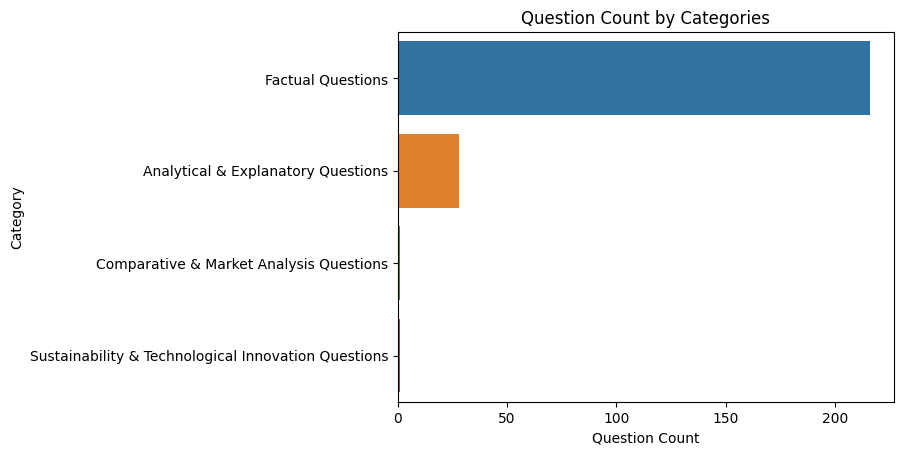

In [54]:
barplot = sns.barplot(
    x=categories_rule_based.values,
    y=categories_rule_based.index,
    hue=categories_rule_based.index
)

barplot.set_title('Question Count by Categories')
barplot.set_xlabel('Question Count')
barplot.set_ylabel('Category')

plt.show()

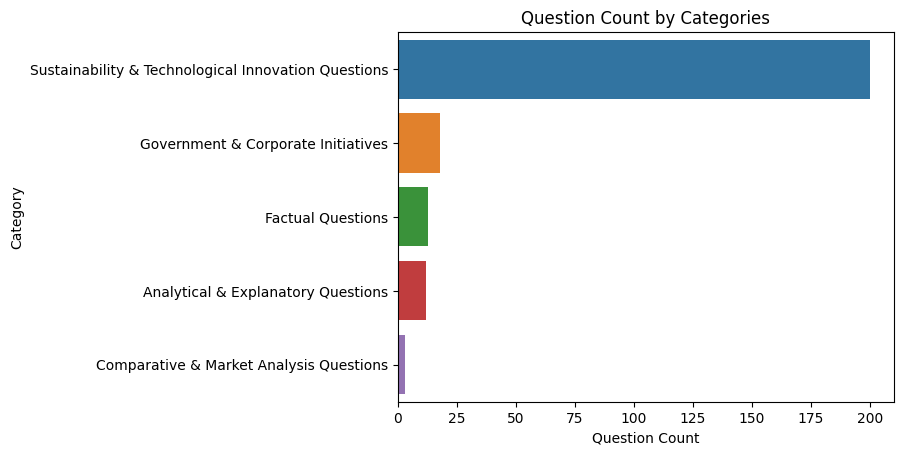

In [55]:
categories_sentence_bert = df_categorized_sentence_bert['category'].value_counts()

barplot = sns.barplot(
    x=categories_sentence_bert.values,
    y=categories_sentence_bert.index,
    hue=categories_sentence_bert.index
)

barplot.set_title('Question Count by Categories')
barplot.set_xlabel('Question Count')
barplot.set_ylabel('Category')

plt.show()

In [56]:
categories_sentence_bert

,count
category,
Sustainability & Technological Innovation Questions,200
Government & Corporate Initiatives,18
Factual Questions,13
Analytical & Explanatory Questions,12
Comparative & Market Analysis Questions,3


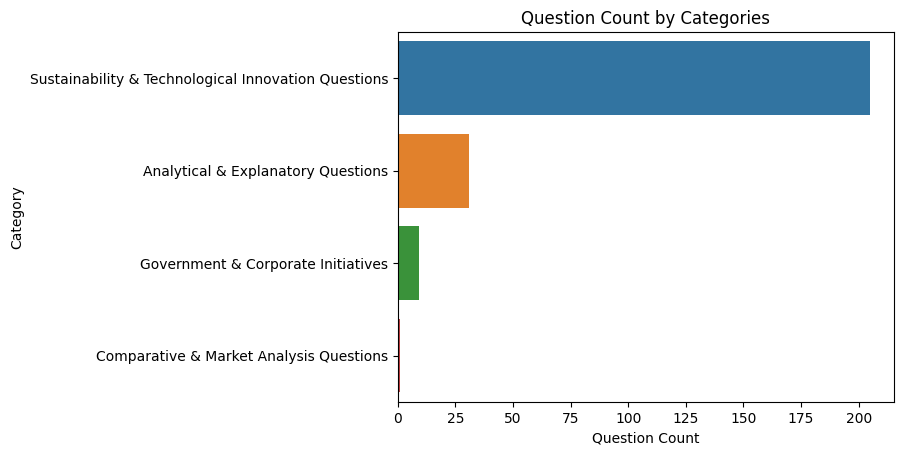

In [68]:
categories_patent_bert = df_categorized_patent_sentence_bert['category'].value_counts()

barplot = sns.barplot(
    x=categories_patent_bert.values,
    y=categories_patent_bert.index,
    hue=categories_patent_bert.index
)

barplot.set_title('Question Count by Categories')
barplot.set_xlabel('Question Count')
barplot.set_ylabel('Category')

plt.show()

In [70]:
categories_patent_bert

,count
category,
Sustainability & Technological Innovation Questions,205
Analytical & Explanatory Questions,31
Government & Corporate Initiatives,9
Comparative & Market Analysis Questions,1


## The QAs pairs are divided in these questions categories:

- Factual Questions

- Comparative & Market Analysis Questions

- Analytical & Explanatory Questions

- Government & Corporate Initiatives

- Sustainability & Technological Innovation Questions



### Factual Questions

Factual Questions: Ask for concrete details or definitions (e.g., “What is…”).

In [97]:
factual_questions = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Factual Questions']['question'].tolist()
factual_df = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Factual Questions']


In [107]:
show_questions("Factual Questions", factual_questions)


Factual Questions
-----------------
1.  Will Hudson Bay polar bears be able to survive and reproduce if global warming exceeds 2.1 degrees Celsius?


2.  What is the impact of global warming on polar bears in Hudson Bay, particularly when it comes to their hunting season and reproductive success?


3.  How might global warming affect the survival rate and reproductive success of polar bears in Hudson Bay?


4.  What is the purpose of the slip ring connector in a solar collector system?


5.  What is the basic structure of a solar tower system?

6.  What is a characteristic of the module unit in a solar tower system?





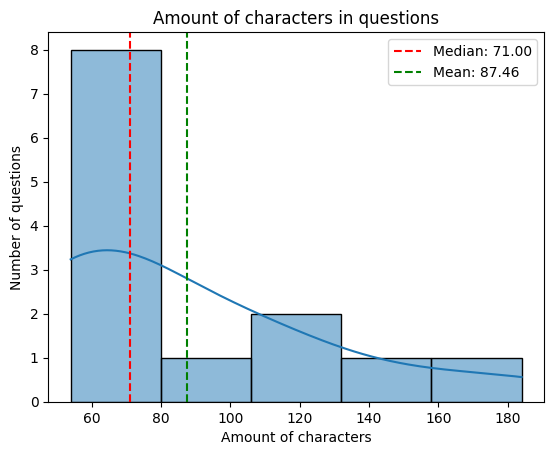

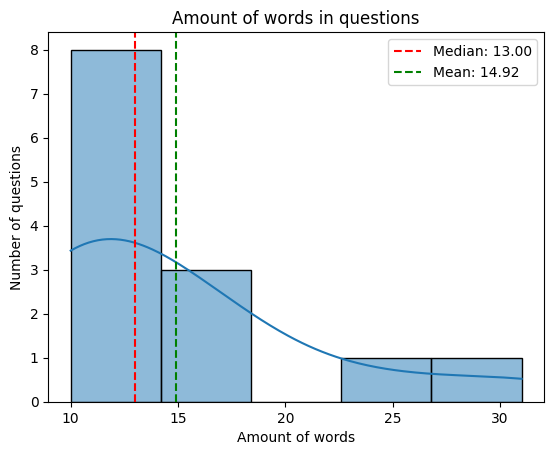

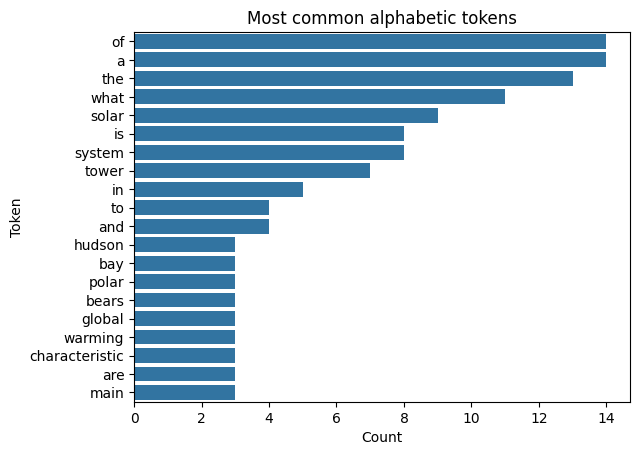

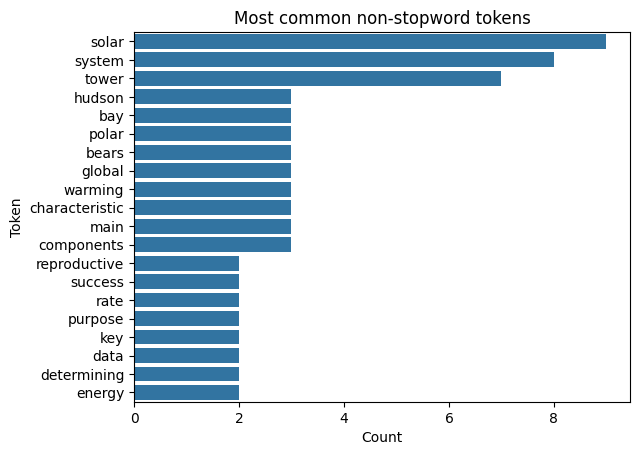

In [119]:
plot_character_distribution(factual_df)
plot_word_distribution(factual_df)
plot_gpt4_token_distribution(factual_df)
plot_non_stopword_token_distribution(factual_df)

### Comparative & Market Analysis Questions

Involve comparing cleantech technologies or approaches (e.g., “What are the differences between…”).

In [120]:
Comparative_Market_Analysis_Questions = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Comparative & Market Analysis Questions']['question'].tolist()
Comparative_Market_Analysis_df = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Comparative & Market Analysis Questions']


In [92]:
show_questions("Comparative & Market Analysis Questions", Comparative_Market_Analysis_Questions)


Comparative & Market Analysis Questions
---------------------------------------
1.  What is one key advantage of the vertical axis wind turbine (VAWT) with improved features described in the reference text?

2.  How can the battery range in a moving vehicle be increased?


3.  What is one of the ways to increase the battery range of a moving vehicle according to the reference text?




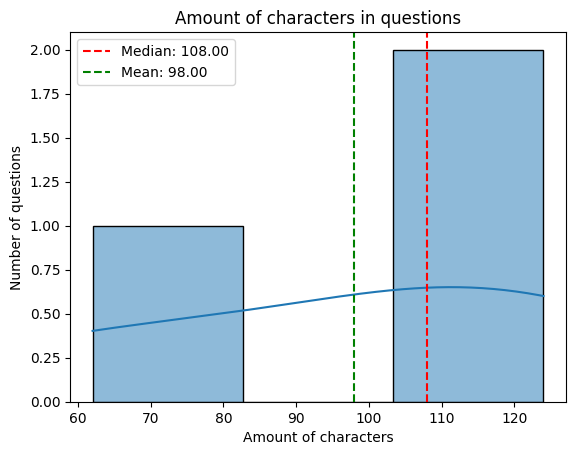

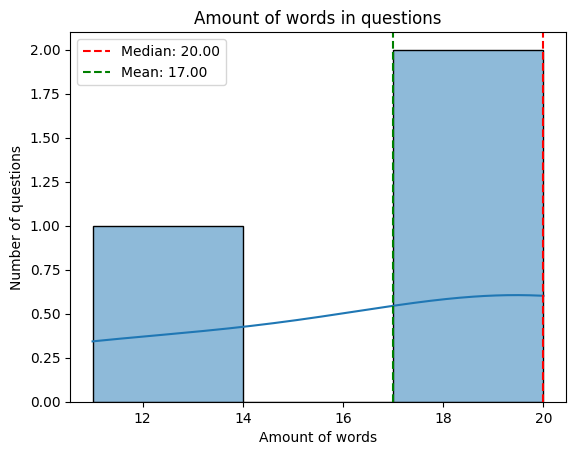

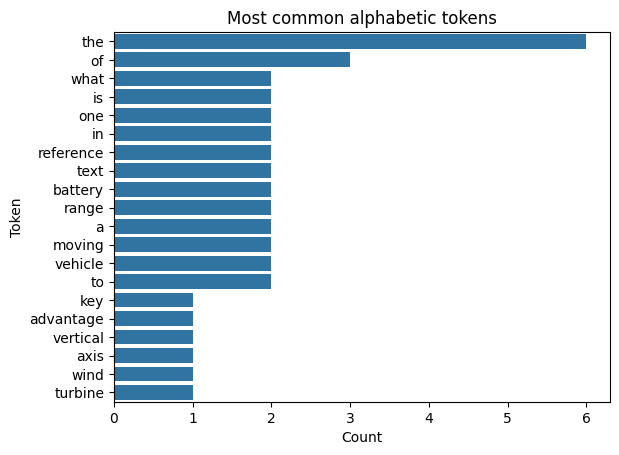

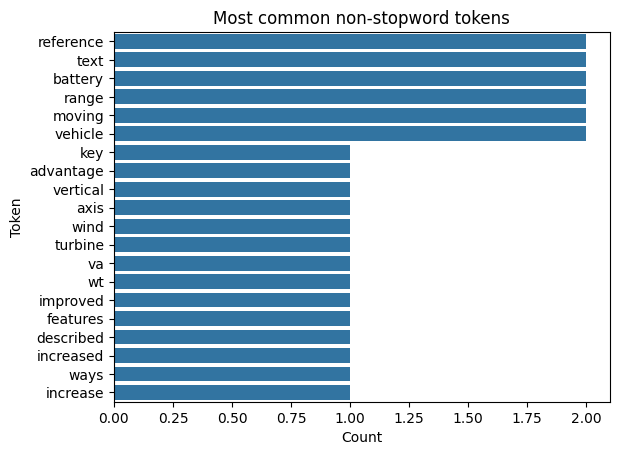

In [122]:
plot_character_distribution(Comparative_Market_Analysis_df)
plot_word_distribution(Comparative_Market_Analysis_df)
plot_gpt4_token_distribution(Comparative_Market_Analysis_df)
plot_non_stopword_token_distribution(Comparative_Market_Analysis_df)

### Analytical & Explanatory Questions

equire reasoning or explanation (e.g., “How does…”).

In [124]:
Analytical_Explanatory_Questions = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Analytical & Explanatory Questions']['question'].tolist()
Analytical_Explanatory_Questions_df = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Analytical & Explanatory Questions']

In [91]:
show_questions("Analytical & Explanatory Questions", Analytical_Explanatory_Questions)


Analytical & Explanatory Questions
----------------------------------
1.  What is the basic configuration of a solar energy system in accordance with an example embodiment?

2.  What are the main components of a solar energy system described in this example embodiment?


3.  What is the purpose of determining a satellite's processing or communication capabilities before routing data traffic or migrating data to another satellite?


4.  What are the steps involved in a method for rerouting data between satellites with varying processing and communication capabilities?


5.  What is the purpose of a method that involves routing data from a satellite with limited capabilities to a satellite with higher processing and communication capabilities, and then computes and transmits the data back to the original satellite?

6.  What is the primary purpose of a method that retrieves a data record, determines a historic energy usage rate, and determines eligibility for a community solar energy gen

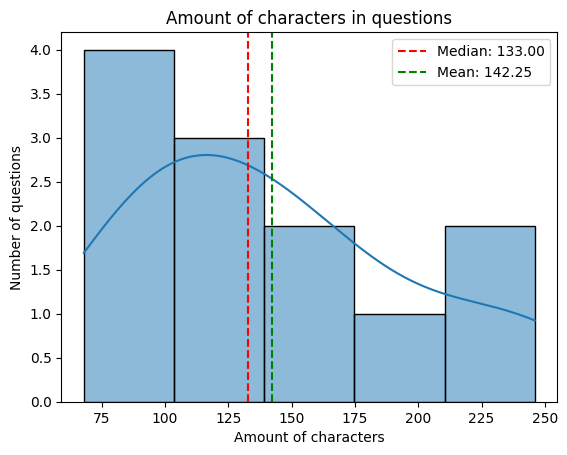

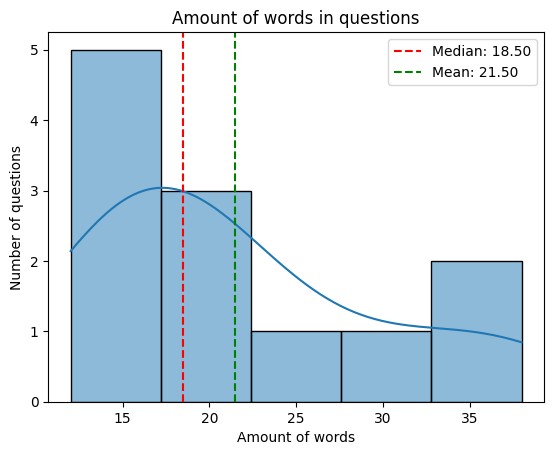

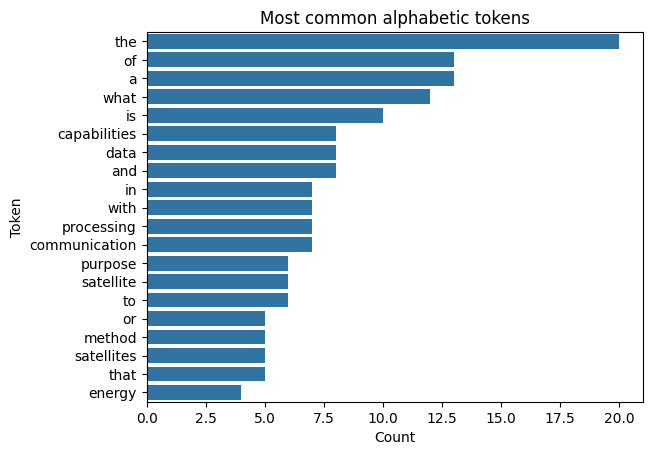

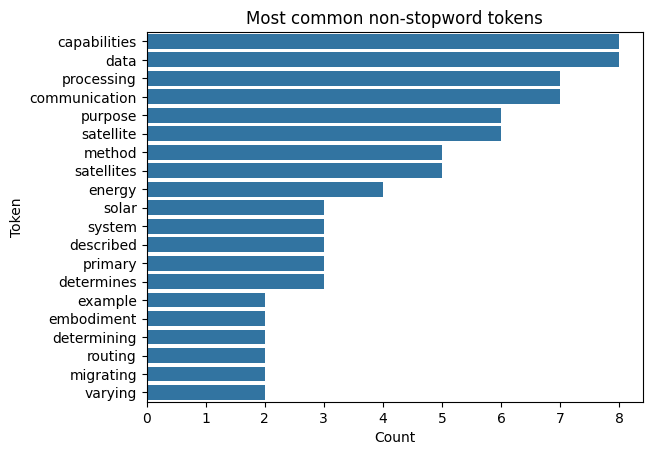

In [125]:
plot_character_distribution(Analytical_Explanatory_Questions_df)
plot_word_distribution(Analytical_Explanatory_Questions_df)
plot_gpt4_token_distribution(Analytical_Explanatory_Questions_df)
plot_non_stopword_token_distribution(Analytical_Explanatory_Questions_df)



### Government & Corporate Initiatives

In [127]:
Government_Corporate_Initiatives = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Government & Corporate Initiatives']['question'].tolist()
Government_Corporate_Initiatives_df = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Government & Corporate Initiatives']

In [90]:
show_questions("Government & Corporate Initiatives", Government_Corporate_Initiatives)


Government & Corporate Initiatives
----------------------------------
1.  What does Monarch Private Capital's investment in renewable energy projects aim to achieve?

2.  What is the current status of solar power in New Jersey, and what is the goal of the state's government regarding solar energy?


3.  What segmentation of the solar energy market will benefit from Monarch Private Capital's 305 MW solar energy project investments?


4.  What is the total amount of financing secured for Recurrent Energy's 160 MW North Fork Solar project in Oklahoma?

5.  What is the significance of Monarch Private Capital's renewed commitment to renewable energy investments?


6.  What is the total amount of clean power investment that Monarch Private Capital has made in solar energy projects across the United States?





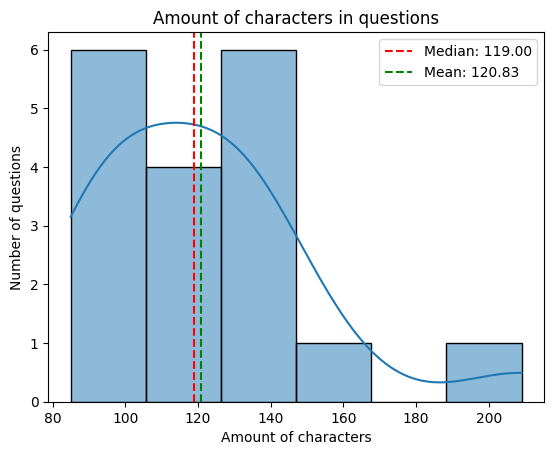

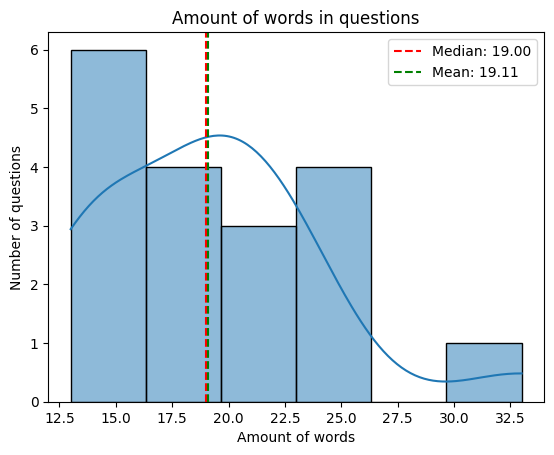

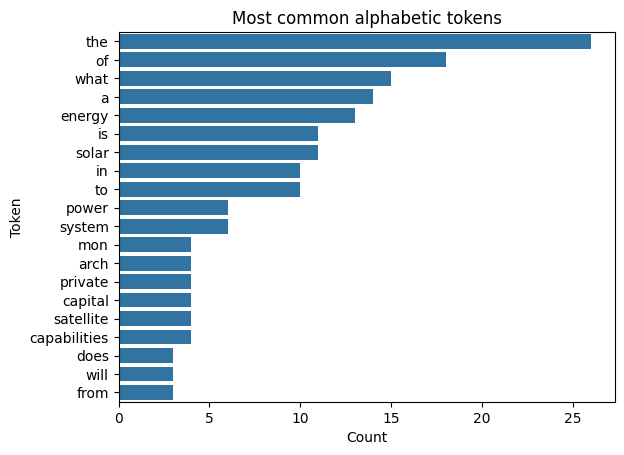

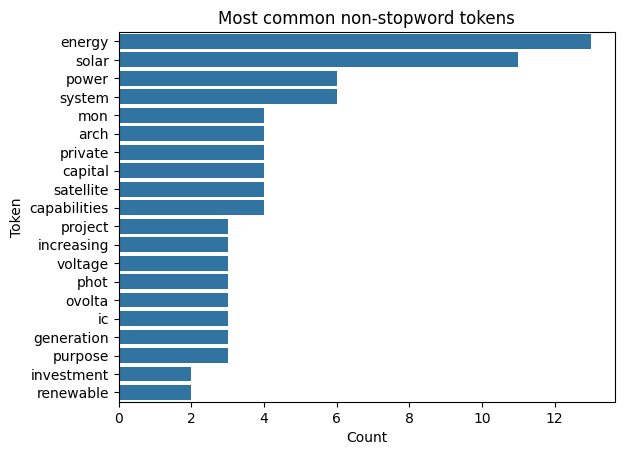

In [128]:
plot_character_distribution(Government_Corporate_Initiatives_df)
plot_word_distribution(Government_Corporate_Initiatives_df)
plot_gpt4_token_distribution(Government_Corporate_Initiatives_df)
plot_non_stopword_token_distribution(Government_Corporate_Initiatives_df)

### Sustainability & Technological Innovation Questions

In [129]:
Sustainability_Technological_Innovation_Questions = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Sustainability & Technological Innovation Questions']['question'].tolist()
Sustainability_Technological_Innovation_Questions_df = df_categorized_sentence_bert[df_categorized_sentence_bert['category'] == 'Sustainability & Technological Innovation Questions']

In [89]:
show_questions("Sustainability & Technological Innovation Questions", Sustainability_Technological_Innovation_Questions)


Sustainability & Technological Innovation Questions
---------------------------------------------------
1.  What is the purpose of the two-year project being led by the National Renewable Energy Laboratory (NREL) in collaboration with the Department of Energy Office of Energy Efficiency and Renewable Energy?


2.  What is the expected timeline for the deployment of Energy Vault's battery energy storage system (BESS) in Nevada?


3.  What is the main goal of the Solar and Storage Industries Institute (SI2) established by the Solar Energy Industries Association (SEIA)?


4.  What type of energy markets does GRNE Solar operate in?

5.  What percentage of the energy resource mix in the Southwest Power Pool (SPP) is currently made up of solar energy?


6.  What is the goal of Hanwha Solutions' investment plan for solar manufacturing expansion in the United States and Korea?





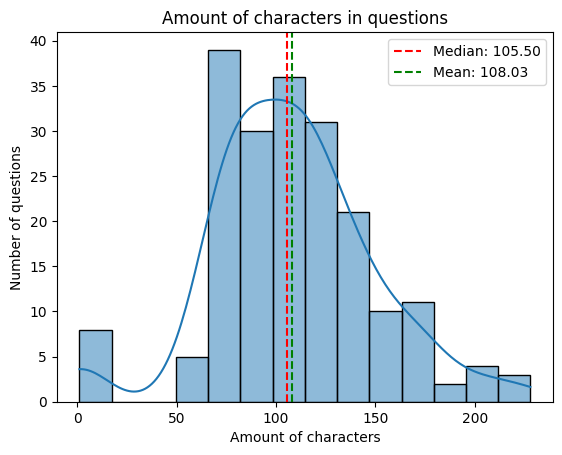

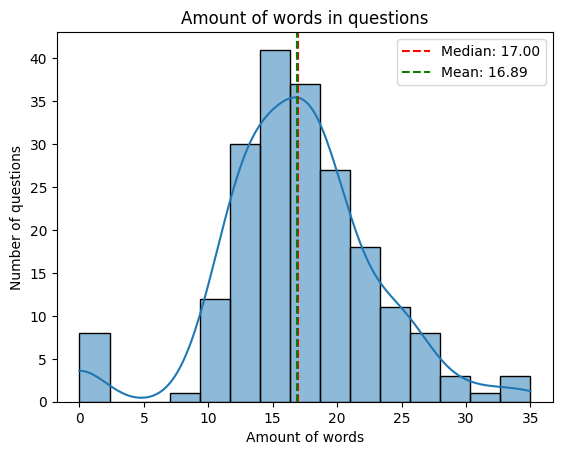

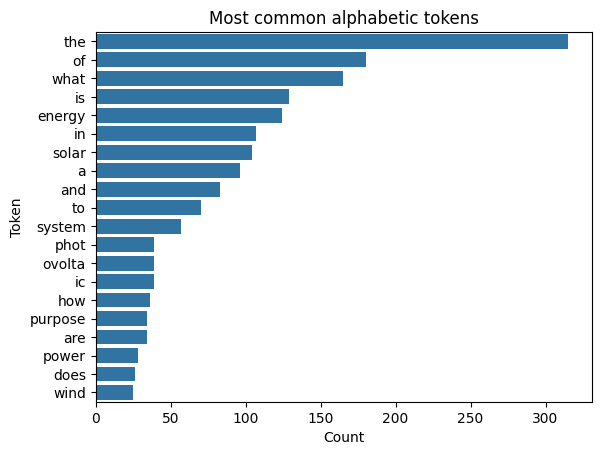

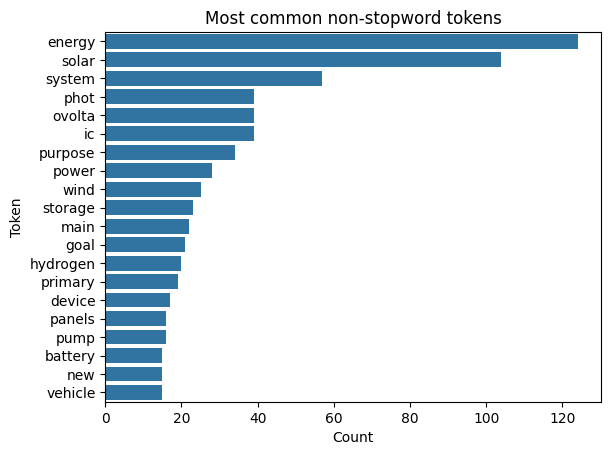

In [130]:
plot_character_distribution(Sustainability_Technological_Innovation_Questions_df)
plot_word_distribution(Sustainability_Technological_Innovation_Questions_df)
plot_gpt4_token_distribution(Sustainability_Technological_Innovation_Questions_df)
plot_non_stopword_token_distribution(Sustainability_Technological_Innovation_Questions_df)